Streaming using .stream()

In [2]:
from typing import TypedDict,Annotated
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages
from langchain_google_genai import ChatGoogleGenerativeAI
import os
from dotenv import load_dotenv
from IPython.display import display,Image
from langgraph.checkpoint.memory import MemorySaver
from pprint import pprint

In [3]:
load_dotenv()
os.environ["GOOGLE_API_KEY"]=os.getenv("GOOGLE_API_KEY")

llm=ChatGoogleGenerativeAI(model="gemini-2.5-flash")

In [4]:
memory=MemorySaver()

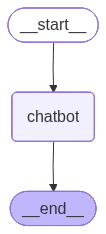

In [5]:

class State(TypedDict):
    messages:Annotated[list,add_messages]

def chatbot(state:State):
    return {"messages":[llm.invoke(state['messages'])]}

graph=StateGraph(State)

graph.add_node("chatbot",chatbot)

graph.add_edge(START,"chatbot")
graph.add_edge("chatbot",END)

graph_builder=graph.compile(checkpointer=memory)
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [6]:
config={"configurable":{"thread_id":"1"}}

In [7]:
for event in graph_builder.stream({"messages":f"hey there, you can call me 007."},config=config,stream_mode="updates"):
    print(event)

{'chatbot': {'messages': [AIMessage(content="Understood, 007. A name that certainly commands attention! It's a pleasure to make your acquaintance.\n\nHow can I assist you today? Ready for your next mission?", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'grounding_metadata': {}, 'model_provider': 'google_genai'}, id='lc_run--cdf436c8-dcde-4335-892b-52f6e4ed502b-0', usage_metadata={'input_tokens': 13, 'output_tokens': 949, 'total_tokens': 962, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 910}})]}}


In [8]:
for event in graph_builder.stream({"messages":f"Assign a mission to learn about astream()"},config=config,stream_mode="values"):
    print(event)

{'messages': [HumanMessage(content='hey there, you can call me 007.', additional_kwargs={}, response_metadata={}, id='e8232220-bcf4-4796-a0f6-ba8cb00323c9'), AIMessage(content="Understood, 007. A name that certainly commands attention! It's a pleasure to make your acquaintance.\n\nHow can I assist you today? Ready for your next mission?", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'grounding_metadata': {}, 'model_provider': 'google_genai'}, id='lc_run--cdf436c8-dcde-4335-892b-52f6e4ed502b-0', usage_metadata={'input_tokens': 13, 'output_tokens': 949, 'total_tokens': 962, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 910}}), HumanMessage(content='Assign a mission to learn about astream()', additional_kwargs={}, response_metadata={}, id='15341e33-2b8c-4024-9a64-948587cd8173')]}
{'messages': [HumanMessage(content='hey

Using astream()

In [9]:
config2={"configurable":{"thread_id":"2"}}
async for event in graph_builder.astream_events({"messages":f"Assign a mission to learn about astream()"},config=config2,version="v2"):
    print(event)

{'event': 'on_chain_start', 'data': {'input': {'messages': 'Assign a mission to learn about astream()'}}, 'name': 'LangGraph', 'tags': [], 'run_id': '1bf4bed2-c609-44ca-86f8-56b79cdec5da', 'metadata': {'thread_id': '2'}, 'parent_ids': []}
{'event': 'on_chain_start', 'data': {'input': {'messages': [HumanMessage(content='Assign a mission to learn about astream()', additional_kwargs={}, response_metadata={}, id='6a871652-a315-49c5-8011-481231dfad67')]}}, 'name': 'chatbot', 'tags': ['graph:step:1'], 'run_id': 'dc8a1eac-f62e-4a6e-8a1b-a723c39f5662', 'metadata': {'thread_id': '2', 'langgraph_step': 1, 'langgraph_node': 'chatbot', 'langgraph_triggers': ('branch:to:chatbot',), 'langgraph_path': ('__pregel_pull', 'chatbot'), 'langgraph_checkpoint_ns': 'chatbot:db1e0431-3239-1e88-69db-9190570d2637'}, 'parent_ids': ['1bf4bed2-c609-44ca-86f8-56b79cdec5da']}
{'event': 'on_chat_model_start', 'data': {'input': {'messages': [[HumanMessage(content='Assign a mission to learn about astream()', additional